In [65]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
import seaborn as sns

In [66]:
# Configuration du style des figures
sns.set_theme()

In [67]:
# Step 1 - Generate data.
np.random.seed(8302)
X = np.linspace(-5, 5, 100).reshape(-1, 1)
# Data generated from sinusoidal function with normal noise
y = np.sin(X).ravel() + np.cos(X).ravel() ** 2 + np.sin(X).ravel() ** 3 + np.random.normal(0, 0.6, X.shape[0]) 

In [68]:
# Split data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=103)

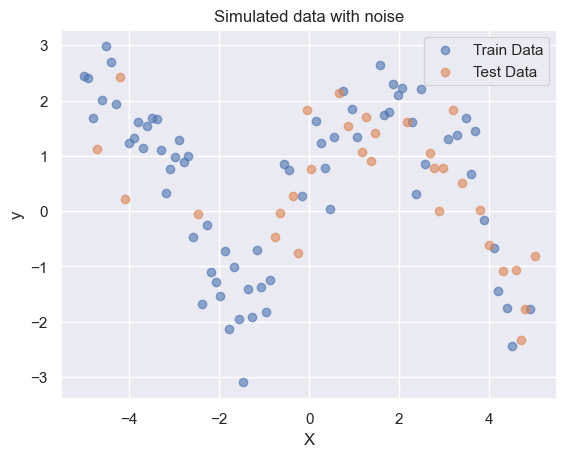

In [69]:
# Visualize the data
plt.scatter(X_train, y_train, label="Train Data", alpha=0.6)
plt.scatter(X_test, y_test, label="Test Data", alpha=0.6)
plt.legend()
plt.xlabel("X")
plt.ylabel("y")
plt.title("Simulated data with noise")
plt.show()

In [70]:
# Step 2 - Define the bias-variance tradeoff function.
def plot_bias_variance_tradeoff(degrees, X_train, X_test, y_train, y_test):
    """
    Function that trains polynomial models of different degrees
    and displays their performances.
    """
    plt.figure(figsize=(12, 5))
    train_errors, test_errors = [], []
    for d in degrees:
        model = make_pipeline(PolynomialFeatures(d), LinearRegression())
        # Train the model on training set.
        model.fit(X_train, y_train)

        # Predictions on training and testing data.
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        # Calculate the mean squared error for training and test data.
        train_error = np.mean((y_train - y_train_pred) ** 2)
        test_error = np.mean((y_test - y_test_pred) ** 2)

        # Append the errors to the lists.
        train_errors.append(train_error)
        test_errors.append(test_error)

        # Visualize the predictions of the model.
        plt.scatter(X_train, y_train, label="Train Data", alpha=0.3)
        plt.scatter(X_test, y_test, label="Test Data", alpha=0.3)

        # Generate a prediction grid.
        X_plot = np.linspace(-5, 5, 100).reshape(-1, 1)
        y_plot = model.predict(X_plot)

        # Add prediction line to the plot for degree d.
        plt.plot(X_plot, y_plot, label=f"Degree {d}")
        plt.xlabel("X")
        plt.ylabel("y")
        plt.legend()
        plt.title(f"Fit for a degree d polynomial model {d}")
        plt.show()

    # Display error curves.
    plt.figure(figsize=(10, 5))
    plt.plot(degrees, train_errors, label="Training Error", marker='o', linestyle='--')
    plt.plot(degrees, test_errors, label="Test Error", marker='o', linestyle='-')
    plt.xlabel("Complexity of the model (polynomial degree)")
    plt.ylabel("Mean Squared Error")
    plt.title("Bias-Variance Tradeoff")
    plt.legend()
    plt.show()

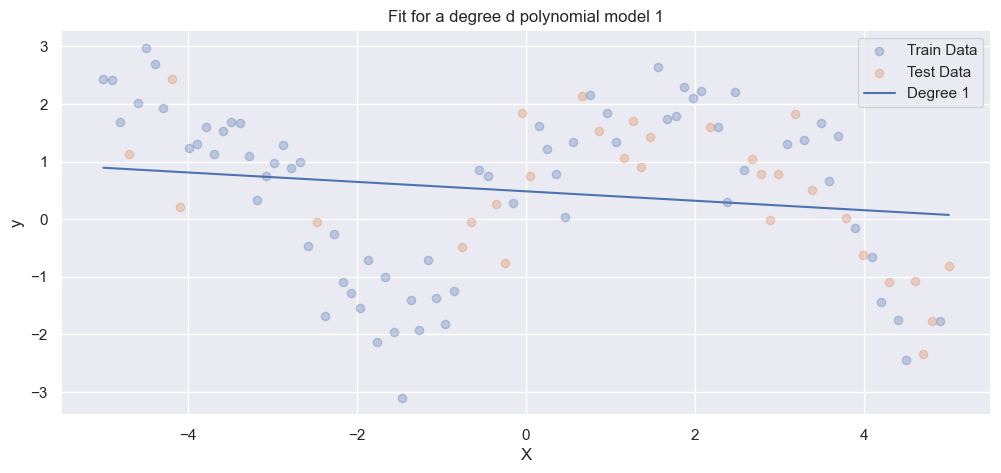

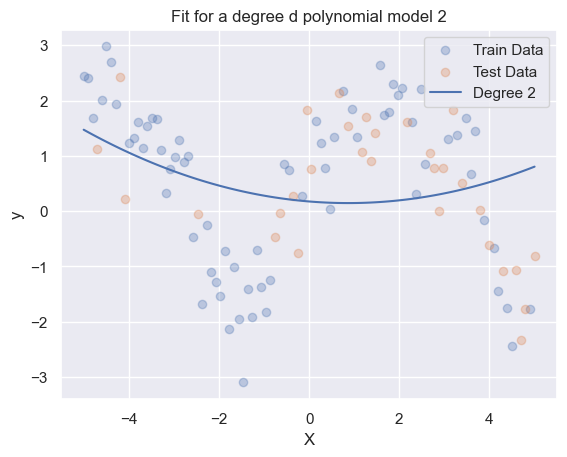

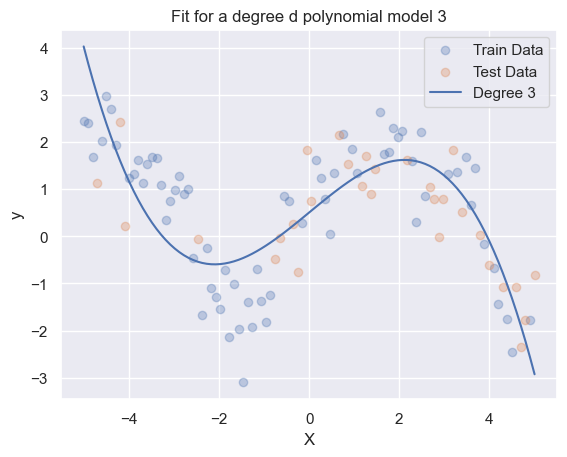

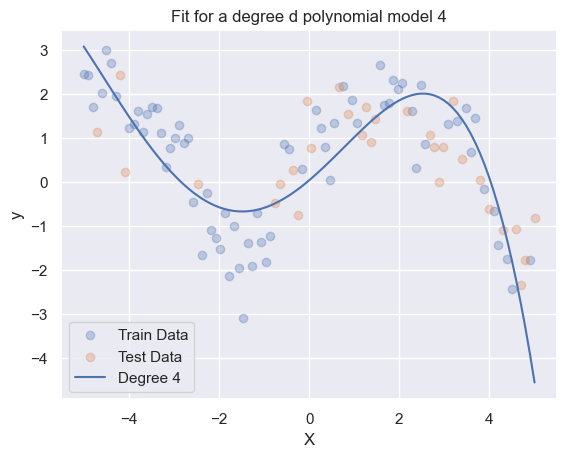

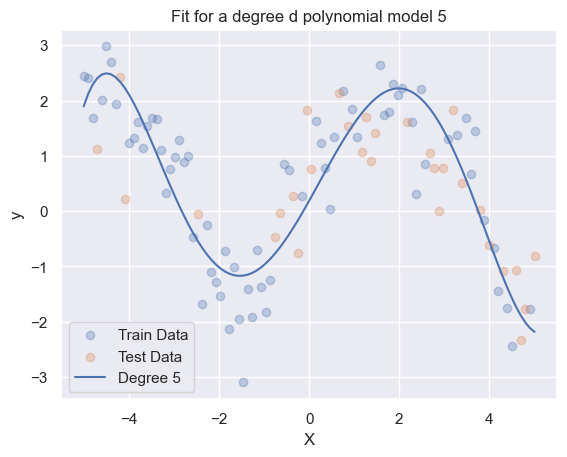

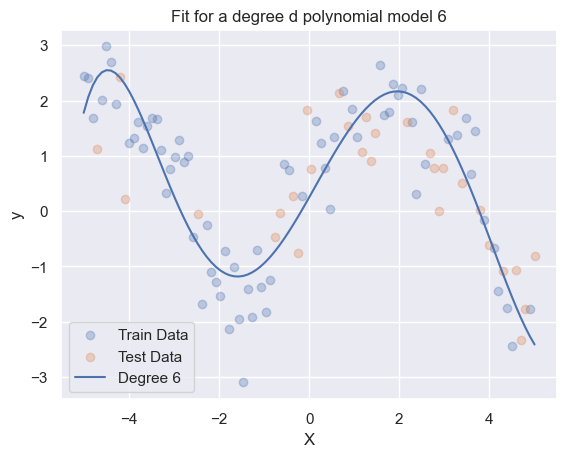

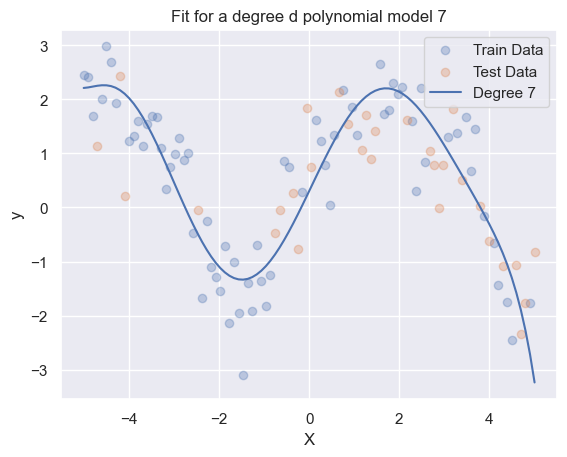

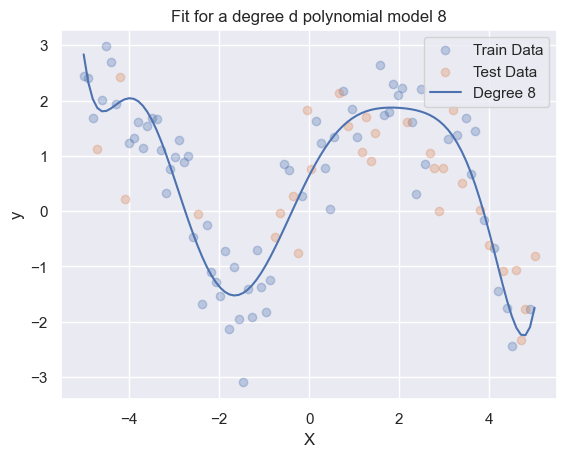

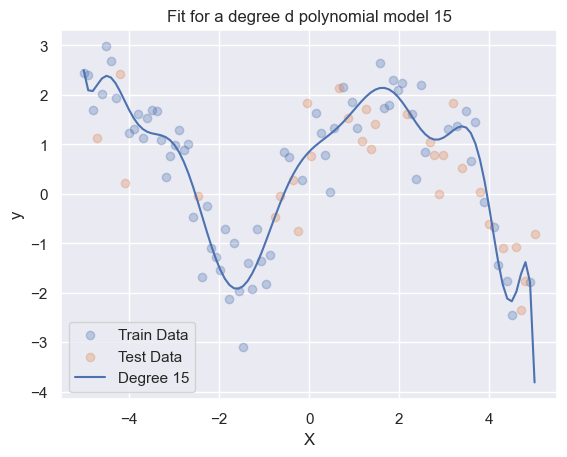

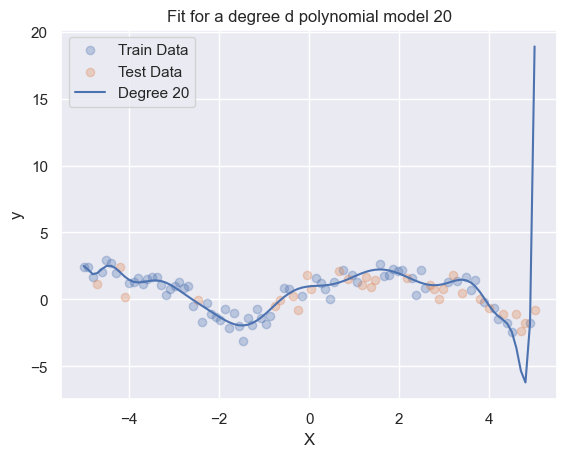

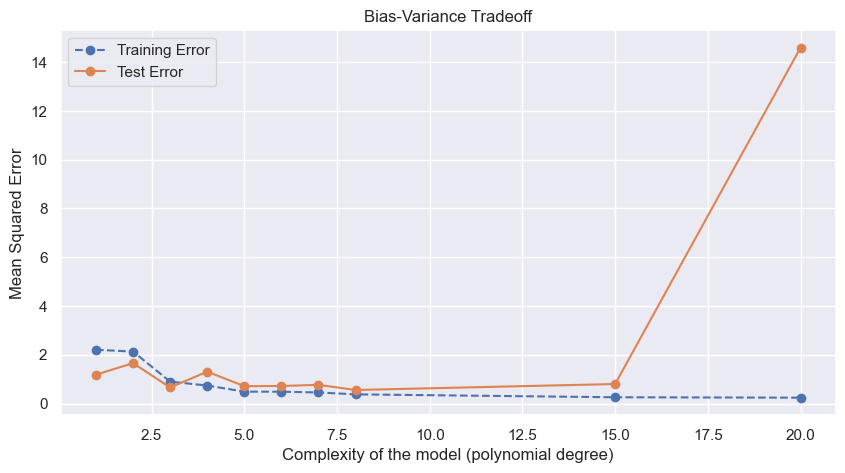

In [71]:
# 3. Experiment : test the function with different degrees.
# Choose a list of degrees to illustrate the three cases of underfitting, good fitting, and overfitting:
plot_bias_variance_tradeoff([1, 2, 3, 4, 5, 6, 7, 8, 15, 20], X_train, X_test, y_train, y_test)